# <center>SOCIAL MEDIA SENTIMENT ANALYSICS </center>

### <center> By Noé Kokou ACHIBE </center>

In [1]:
#intall spacy module
#!pip install spacy
#nlp=spacy.cli.download('en_core_web_sm')
#!pip install nltk
#!pip install wordcloud

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import spacy
import nltk
from spacy.lang.en.stop_words import STOP_WORDS
from tqdm import tqdm #décorateur d'itération
from collections import Counter
from sklearn import model_selection

In [3]:
df=pd.read_csv("Tweets.csv")

In [4]:
df.shape

(14640, 15)

In [5]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [54]:
df.shape

(14640, 17)


| Variable                    | Meaning                                                   |type
|-----------------------------|-----------------------------------------------------------|---------------------------------------------------|
| `tweet_id`                  | The unique identifier associated with each tweet.         |integer|
| `airline_sentiment`         | The sentiment expressed in the tweet towards the airline, which can be positive, negative, or neutral. |object|
| `airline_sentiment_confidence` | The confidence of the sentiment attribution, measured as a confidence score. |float|
| `negativereason`            | The reason for the negative reaction expressed in the tweet, if any. This can include various reasons such as customer service, delays, etc. |objet|
| `negativereason_confidence` | The confidence of the negative reason attribution, measured as a confidence score.|float|
| `airline`                   | The airline mentioned in the tweet.                       |object|
| `airline_sentiment_gold`    | The sentiment attributed to the airline by a user with higher confidence.|object|
| `name`                      | The name of the user who posted the tweet.                |string|
| `negativereason_gold`       | The negative reason attributed to the airline by a user with higher confidence.|string|
| `retweet_count`             | The number of retweets of the tweet.                      |integer|
| `text`                      | The text content of the tweet.                            |string|
| `tweet_coord`               | The geographic coordinates of the tweet, if available.    |object|
| `tweet_created`             | The date and time when the tweet was created.             |date|
| `tweet_location`            | The location associated with the user who posted the tweet.|oject|
| `user_timezone`             | The timezone of the user who posted the tweet.            |objet|

### Analysis Plan

1. **Exploratory Data Analysis:**
   - Check the data types of each variable.
   - Identify missing values and decide on strategies for handling missing data.
2. **Univariate Analysis:**
   - Analysis of categorical variables (`negativereason`, `airline`, `user_timezone`, etc.): category frequencies, bar charts.
   - Analysis of numerical variables (`airline_sentiment_confidence`, `negativereason_confidence`, `retweet_count`): descriptive statistics, distributions.

3. **Bivariate Analysis:**
   - Relationship between `airline_sentiment` and other categorical variables: cross-tabulations, stacked bar charts.
   - Relationship between `airline_sentiment` and numerical variables: boxplots
4. **Multivariate Analysis:**
   - Correlation between numerical variables: correlation matrix, heatmap.
   - Visualization of interactions between variables: scatter plots colored by the target variable.

5. **Textual Analysis **
   - Text processing in the `text` variable: tokenization, punctuation removal, lemmatization, etc.
   - Modeling feactures predictions.

6. **Conclusion and Interpretation:**
   - Synthesis of key observations.
   - Identification of trends, patterns, and insights.
   - Recommendations for future actions, if applicable.

In [7]:
#data type of each variableprint(df_filtered)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
#change type of tweet_created

df['tweet_created']=pd.to_datetime(df['tweet_created'])

#extrate day

df['tweet_day'] = df['tweet_created'].dt.day

#extrate hour

df['tweet_hour']=df['tweet_created'].dt.hour

In [53]:
threshold = 0.3
# Calculate the percentage of missing values per column
percentage_missing = (df.isna().sum() / len(df)) * 100

# Select columns with a percentage of missing values below the threshold
columns_to_keep = percentage_missing[percentage_missing < threshold].index

# Create a new DataFrame with the selected columns
df_filtered = df[columns_to_keep]

# Display the resulting DataFrame
print("DataFrame with columns having less than {}% missing values:".format(threshold * 100))
df_filtered.info()

DataFrame with columns having less than 30.0% missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 14640 entries, 2569 to 4325
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype                    
---  ------                        --------------  -----                    
 0   tweet_id                      14640 non-null  int64                    
 1   airline_sentiment             14640 non-null  object                   
 2   airline_sentiment_confidence  14640 non-null  float64                  
 3   airline                       14640 non-null  object                   
 4   name                          14640 non-null  object                   
 5   retweet_count                 14640 non-null  int64                    
 6   text                          14640 non-null  object                   
 7   tweet_created                 14640 non-null  datetime64[ns, UTC-08:00]
 8   tweet_day                     14640 non-null  int32      

In [10]:
numeric_variable=['airline_sentiment_confidence','retweet_count']
categorical_variable=['airline_sentiment','airline']
time_variable=['tweet_day','tweet_hour']

#### Univariate analysis

In [11]:
df_filtered['airline_sentiment_confidence'].describe()

count    14640.000000
mean         0.900169
std          0.162830
min          0.335000
25%          0.692300
50%          1.000000
75%          1.000000
max          1.000000
Name: airline_sentiment_confidence, dtype: float64

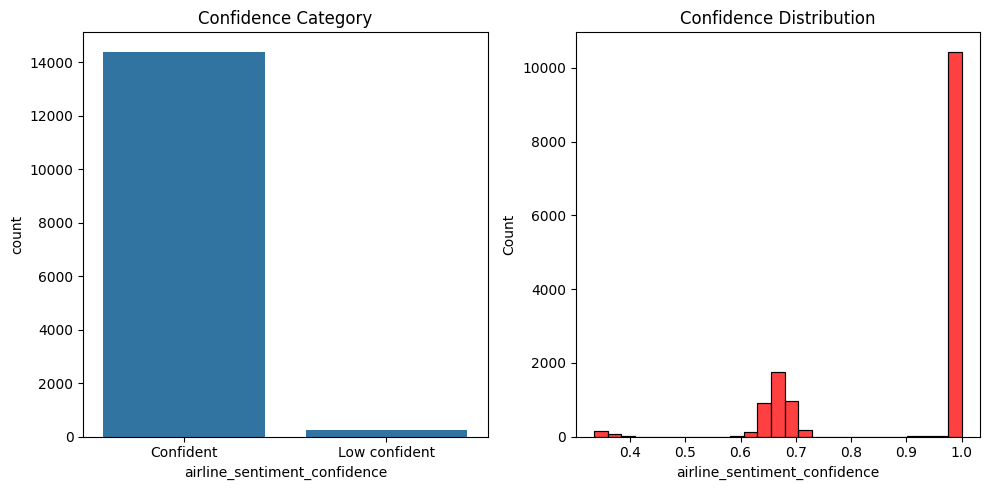

In [12]:
# Function to categorize values
def categorize_confidence(value):
    if value > 0.5:
        return 'Confident'
    else:
        return 'Low confident'

plt.figure(figsize=(10, 5))
# First subplot: barplot
plt.subplot(1, 2, 1)
sns.barplot(x=df_filtered['airline_sentiment_confidence'].apply(categorize_confidence).value_counts().index, 
            y=df_filtered['airline_sentiment_confidence'].apply(categorize_confidence).value_counts())
plt.title('Confidence Category')
# Second subplot: histogram
plt.subplot(1, 2, 2)
sns.histplot(df_filtered['airline_sentiment_confidence'],color='red')
plt.title('Confidence Distribution')

# Display subplots
plt.tight_layout()  # To prevent overlapping of the plots
plt.show()

In [13]:
df_filtered['retweet_count'].value_counts()

retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: count, dtype: int64

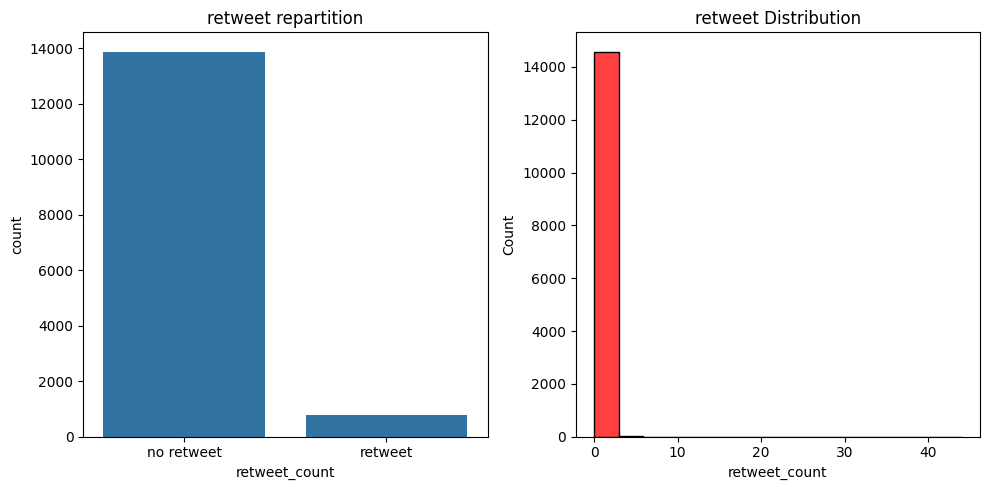

In [14]:
# Function to categorize values
def categorize_retweetcount(value):
    if value==0:
        return 'no retweet'
    else:
        return 'retweet'


plt.figure(figsize=(10, 5))
# First subplot: barplot
plt.subplot(1, 2, 1)
sns.barplot(x=df_filtered['retweet_count'].apply(categorize_retweetcount).value_counts().index, 
            y=df_filtered['retweet_count'].apply(categorize_retweetcount).value_counts())
plt.title('retweet repartition')
# Second subplot: histogram
plt.subplot(1, 2, 2)
sns.histplot(df_filtered['retweet_count'],color='red')
plt.title('retweet Distribution')

# Display subplots
plt.tight_layout()  # To prevent overlapping of the plots
plt.show()

/tmp/ipykernel_61639/3058308403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_filtered['airline_sentiment'].value_counts().index,y=df_filtered['airline_sentiment'].value_counts(),palette='Set1')
/tmp/ipykernel_61639/3058308403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_filtered['airline'].value_counts().index,y=df_filtered['airline'].value_counts(),palette='Set2')


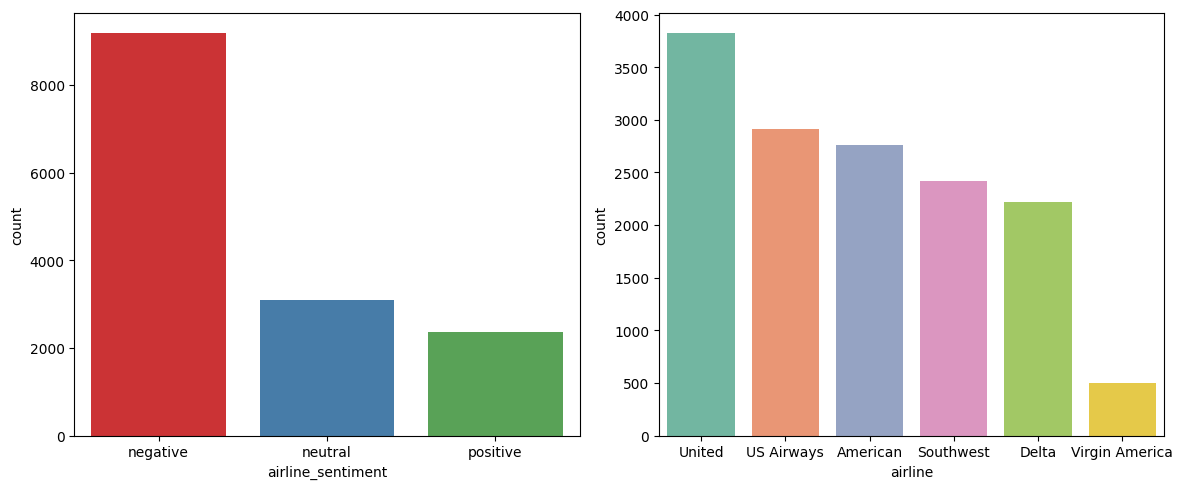

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=df_filtered['airline_sentiment'].value_counts().index,y=df_filtered['airline_sentiment'].value_counts(),palette='Set1')
plt.subplot(1,2,2)
sns.barplot(x=df_filtered['airline'].value_counts().index,y=df_filtered['airline'].value_counts(),palette='Set2')
plt.tight_layout()  # To prevent overlapping of the plots
plt.show()

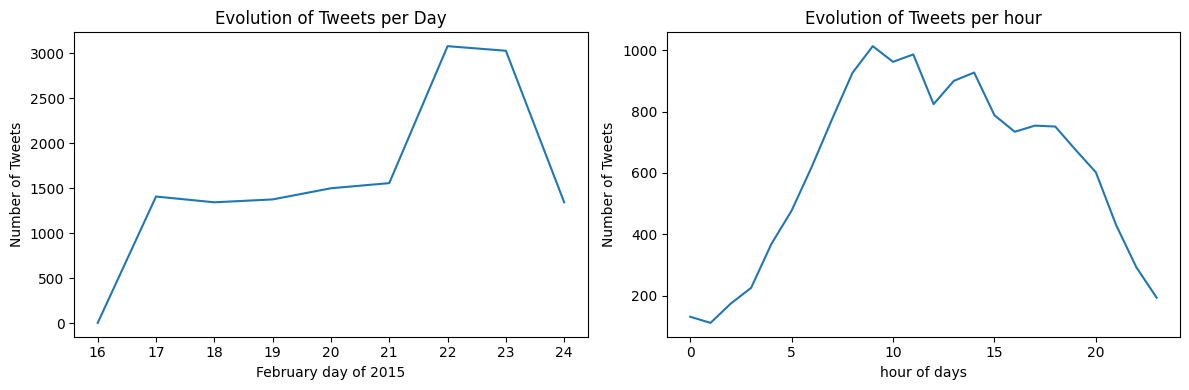

In [16]:
# Sort the DataFrame by the 'tweet_day' column to ensure it's ordered chronologically

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
df = df.sort_values('tweet_day')
sns.lineplot(df['tweet_day'].value_counts())
plt.xlabel('February day of 2015')
plt.ylabel('Number of Tweets')
plt.title("Evolution of Tweets per Day")
plt.subplot(1,2,2)
df = df.sort_values('tweet_hour')
sns.lineplot(df['tweet_hour'].value_counts())
plt.xlabel('hour of days')
plt.ylabel('Number of Tweets')
plt.title("Evolution of Tweets per hour")
plt.tight_layout()
plt.show()


#### Bivariate analysis

In [17]:
numeric_variable

['airline_sentiment_confidence', 'retweet_count']

/tmp/ipykernel_61639/3605579167.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered['airline_sentiment'],y=df_filtered['airline_sentiment_confidence'],palette='magma')


<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

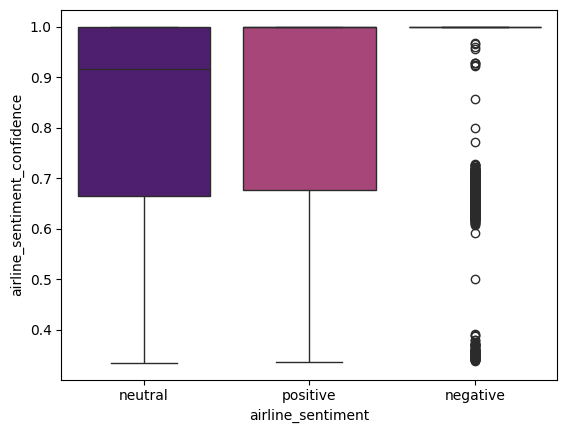

In [18]:
sns.boxplot(x=df_filtered['airline_sentiment'],y=df_filtered['airline_sentiment_confidence'],palette='magma')

/tmp/ipykernel_61639/3151962726.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_filtered['airline_sentiment'],y=df_filtered['retweet_count'],palette='magma')


<Axes: xlabel='airline_sentiment', ylabel='retweet_count'>

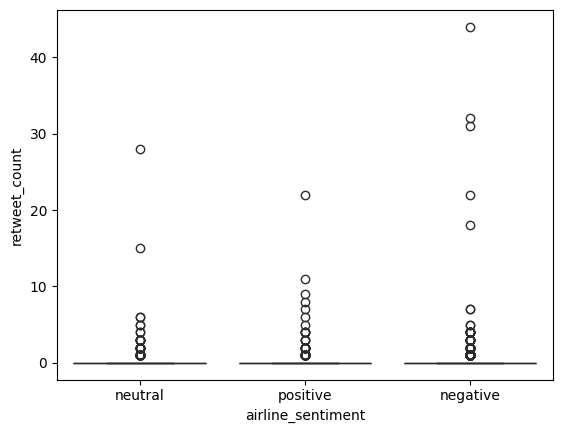

In [19]:
sns.boxplot(x=df_filtered['airline_sentiment'],y=df_filtered['retweet_count'],palette='magma')

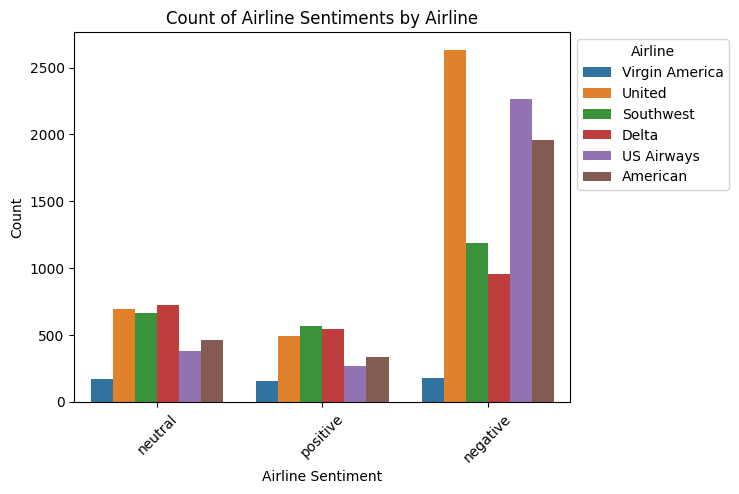

In [20]:
sns.countplot(data=df_filtered, x='airline_sentiment', hue='airline')
plt.xlabel('Airline Sentiment')
plt.ylabel('Count')
plt.title('Count of Airline Sentiments by Airline')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Airline', bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.show()

 ### Text analysis

In [21]:
nlp=spacy.load('en_core_web_sm')

In [22]:
message=df['text']

In [23]:
#created class to fing emails, links, code zip, phone numbers ...
class recherche:
    def __int__(self,texte):
        self.texte=texte
    def emails(self):
        Emails = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b'
        emails = []
        for phrase in self:
                Emailmatches = re.findall(Emails, phrase) 
                emails.extend(Emailmatches)
        return emails
    def liens(self):
        Liens=r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+" 
        liens=[]
        for phrase in self:
            Lienmatches = re.findall(Liens, phrase)
            liens.extend(Lienmatches)
        return liens
    def tel(self):
        Tel=r'\d+(\.\d+)?'
        tel=[]
        for phrase in self:
            Telmatches = re.findall(Tel, phrase)
            tel.extend(Telmatches)
        return tel
    def nombre(self):    
        Nombre=r"\d+"
        nombre=[]
        for phrase in self:
            Nombrematches = re.findall(Nombre, phrase)
            nombre.extend(Nombrematches)
        return nombre
    def BP(self):
        CodePostal=r"\b\d{5}\b"
        codepostal=[]
        for phrase in self:
            CodePostalmatches = re.findall(CodePostal, phrase)
            codepostal.extend(CodePostalmatches)
        return codepostal

In [24]:
#Searching
print("il y a ", len(recherche.emails(message))," emails, ",
     len(recherche.liens(message)), " links, ",
     len(recherche.tel(message)), "phone numbers, ", 
     len(recherche.nombre(message)), " numbers",
     len(recherche.BP(message)), "postal code in comments")

il y a  16  mails,  1211  liens,  9946 numéro de téléphone,  10096  nombre et  6 Code postal dans les commentaires


In [25]:
# Remove emails
processed = message.str.replace(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', '', regex=True)
# Remove web addresses
processed = processed.str.replace(r'http\S+', '', regex=True)
# Remove currency units
processed = processed.str.replace(r'[$€£¥₹₽₱₩₦₴฿₿₸៛₮₵₲₪₫₯₠₣₧₱₰₲₳₶]', '', regex=True)
# Remove phone numbers
processed = processed.str.replace(r'\b\d{10}\b', '', regex=True)
# Remove numbers
processed = processed.str.replace(r'\d+(\.\d+)?', ' ', regex=True)
# Remove emoticons
processed = processed.str.replace(r'[^\w\d\s]', ' ', regex=True)
# Reduce large empty spaces
processed = processed.str.replace(r'\s+', ' ', regex=True)
# Remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$', '', regex=True)
# Remove postal codes
processed = processed.str.replace(r'^\s+|\s+?$', '', regex=True)

In [26]:
#New search
print("There are ", len(recherche.emails(processed)), " emails, ",
     len(recherche.liens(processed)), " links, ",
     len(recherche.tel(processed)), " phone numbers, ",
     len(recherche.nombre(processed)), " numbers, and ",
     len(recherche.BP(processed)), " postal codes in the comments.")

il y a  0  mails,  0  liens,  0 numéro de téléphone,  0  nombre et  0 Code postal dans les commentaires


In [27]:
stopwords=list(STOP_WORDS)#creat the list of stopwords
punctuations = string.punctuation

In [28]:
#Created prepocessing function
from spacy.lang.en import English
parser = English()
def preprocess(sentence):
    sentence=nlp(sentence)
    montokens = parser(sentence)
    montokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in montokens ]
    montokens = [ word for word in montokens if word not in stopwords and word not in punctuations ]
    montokens = " ".join([i for i in montokens])
    return montokens

In [29]:
#Aplly preprocessing function
tqdm.pandas()
processed= processed.progress_apply(preprocess)

  0%|          | 0/14640 [00:00<?, ?it/s]

100%|██████████| 14640/14640 [03:07<00:00, 78.04it/s]


In [30]:
# Function to extract named entities
def extract_entities(text):
    text = nlp(text)
    entities = [(entity.text, entity.label_) for entity in text.ents]
    return entities

In [31]:
#Function to extract the most frequent topics
def extract_topics(texts, top_n=20):
    all_topics = []
    for text in texts:
        doc = nlp(text)
        topics = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop and token.pos_ == 'NOUN']
        all_topics.extend(topics)
    topic_counts = Counter(all_topics)
    top_topics = topic_counts.most_common(top_n)
    return top_topics

In [32]:
# Function to extract common issues from a list of texts
def extract_common_issues(texts,common_issues):
    issues = []
    for doc in texts:
        doc = nlp(doc)
        for issue in common_issues:
            if issue in doc.text.lower():
                issues.append(issue)
    common_issues_counts = Counter(issues)
    return common_issues_counts

In [34]:
# Extract named entities for each comment in the processed data
entities = [extract_entities(i) for i in processed]
# Print the named entities for the first 10 comments
print("Named Entities: \n")
for comment_entities in entities[1:10]:
    print(comment_entities)


Entités nommées: 

[('jetblue s', 'PERSON')]
[('usairway', 'ORG'), ('dallas', 'GPE'), ('friday', 'DATE')]
[('hour', 'TIME'), ('dsearl', 'PERSON')]
[('united laurasbrown', 'GPE')]
[('united access dial fast', 'ORG')]
[('united ll', 'ORG')]
[('united', 'ORG'), ('feb', 'CARDINAL')]
[('united denairport', 'ORG'), ('united snowy', 'ORG'), ('denver', 'GPE')]
[('kieranmahan', 'GPE'), ('night', 'TIME')]


In [52]:
# Extract the top frequent topics from the processed data
top_topics = extract_topics(processed)
# Print the most frequent topics and their occurrences
print("\nTop Topics:")
for topic, count in top_topics:
    print(f"{topic}: {count} occurrences")


Top Topics:
flight: 4344 occurrences
americanair: 2315 occurrences
southwestair: 1533 occurrences
hour: 1152 occurrences
usairway: 1065 occurrences
time: 954 occurrences
service: 945 occurrences
customer: 908 occurrences
delay: 810 occurrences
plane: 668 occurrences
bag: 631 occurrences
day: 554 occurrences
thank: 494 occurrences
help: 457 occurrences
phone: 442 occurrences
seat: 435 occurrences
today: 430 occurrences
ticket: 380 occurrences
guy: 378 occurrences
change: 369 occurrences


In [36]:
# List of common issues to search for in the processed data
common_issues = ["bad", "help", "seat", "booking", "bag", 'time', 'problem']
# Extract counts of common issues from the processed data
common_issues_counts = extract_common_issues(processed, common_issues)
# Print the occurrences of each common issue
print("\nCommon Issues:")
for issue, count in common_issues_counts.items():
    print(f"{issue}: {count} occurrences")


Problèmes courants:
help:1059 occurrences
bag:912 occurrences
bad:526 occurrences
seat:489 occurrences
time:977 occurrences
booking:145 occurrences
problem:314 occurrences


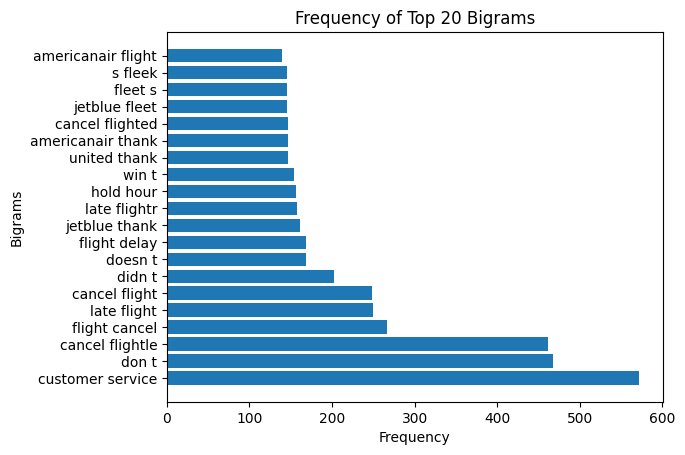

In [51]:
# List to store the bigrams
big = []

# Iterate through each comment
for comment in processed:
    doc = nlp(comment)
    
    # Generate bigrams for each pair of consecutive words
    for j in range(len(doc) - 1):
        bigram = str(doc[j]) + ' ' + str(doc[j+1])
        big.append(bigram)

# Count the frequency of the bigrams
big_count = Counter(big)

# Sort the bigrams by decreasing frequency
trie = sorted(big_count.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 sorted bigrams and their corresponding frequencies
top_bigrams = [bigram for bigram, _ in trie[:20]]
frequencies = [count for _, count in trie[:20]]

# Create the bar plot
plt.barh(top_bigrams, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Frequency of Top 20 Bigrams')
plt.show()

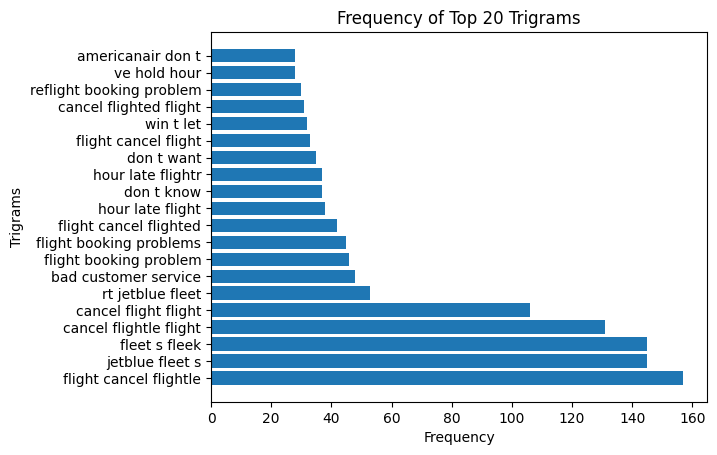

In [38]:
# Empty list for storing trigrams
trig = []

# Iterate through each comment
for comment in processed:
    # Process the comment using the NLP pipeline
    doc = nlp(comment)
    
    # Generate trigrams
    for j in range(len(doc) - 2):
        # Create trigram by concatenating three consecutive tokens
        trigram = str(doc[j]) + ' ' + str(doc[j+1]) + ' ' + str(doc[j+2])
        # Append trigram to the list
        trig.append(trigram)

# Count the frequency of each trigram
trig_count = Counter(trig)

# Sort trigrams by frequency in descending order
trie_gram = sorted(trig_count.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 sorted trigrams and their corresponding frequencies
top_trigrams = [trigram for trigram, _ in trie_gram[:20]]
frequencies_ti = [count for _, count in trie_gram[:20]]

# Create the bar plot for the top 20 trigrams
plt.barh(top_trigrams, frequencies_ti)
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Frequency of Top 20 Trigrams')
plt.show()

In [39]:
all_words =[]
for message in processed:
    words = nlp(message)
    for w in words:
        all_words.append(w)

all_words = nltk.FreqDist(all_words)

In [40]:
# afficher le nombre total de mots
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: 131811
Most common words: [(united, 1), (yes, 1), (robotic, 1), (answer, 1), (jetblue, 1), (s, 1), (ceo, 1), (battle, 1), (appease, 1), (passengers, 1), (wall, 1), (street, 1), (usairway, 1), (excited, 1), (ll, 1)]


In [41]:
# use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [42]:
# The find_features function will determine which of the 1500 word features are contained in the review
def find_features(message):
    words =nlp(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

# Lets see an example!
features = find_features(str(processed[0]))
for key, value in features.items():
    if value == True:
        print (key)

In [43]:
# Créer un dictionnaire de correspondance pour l'encodage
encoding_map = {'negative': 0, 'neutral': 1, 'positive': 2}

# Appliquer l'encodage à la variable airline_sentiment
classes= df['airline_sentiment'].map(encoding_map)


In [44]:
# Now lets do it for all the messages
messages = list(zip(processed, classes))

In [45]:
# define a seed for reproducibility
seed = 1
np.random.seed = seed
np.random.shuffle(messages)

# call find_features function for each SMS message
featuresets = [(find_features(text), label) for (text, label) in messages]

In [46]:
# split the data into training and testing datasets
training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

In [47]:
print(len(training))
print(len(testing))

10980
3660


In [48]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [49]:
# We can use sklearn algorithms in NLTK
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

# Create an SVC model with a linear kernel
model = SklearnClassifier(SVC(kernel='linear'))

# Train the model on the training data
model.train(training)

# Test the model on the testing dataset
accuracy = nltk.classify.accuracy(model, testing) * 100
print("SVC Accuracy: {:.2f}%".format(accuracy))

SVC Accuracy: 63.31%


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Define models to train
names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]
models = zip(names, classifiers)
names1 = []
results = []

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model, testing)*100
    print("{} Accuracy: {}".format(name, accuracy))
    names1.append(name)
    results.append(accuracy)

/bin/bash: ligne 1: python : commande introuvable
K Nearest Neighbors Accuracy: 63.306010928961754
Decision Tree Accuracy: 63.306010928961754
Random Forest Accuracy: 63.306010928961754
Logistic Regression Accuracy: 63.306010928961754
SGD Classifier Accuracy: 63.306010928961754
Naive Bayes Accuracy: 63.306010928961754
SVM Linear Accuracy: 63.306010928961754
